### Modeles Stochastiques en Finance MAP 552
#### Computer Problem Set 3.3
### Two-factor gaussian yield curve
##### GNABEYEU MBIADA Emmanuel

##### Import useful librarY

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

Let $B = (B_1,B_2)$ be a Brownian motion in $\mathbb{R}^2$ under the risk-neutral mea- sure $\mathbb{Q}$, and $x_i, \lambda_i, \theta_i, \sigma_i$ be some positive parameters. We assume that the instantaneous interest rate is defined by
$r_t := X^{(1)}_t + X^{(2)}_t$ where $dX^{(i)}_t = \lambda (\theta − X^{(i)}_t)dt + \sigma dB^i_t$, $X^{(i)}_0 = x_i$ , i = 1, 2. 

The no-arbitrage price of the T−maturity zero-coupon bond is given by $P_0(T) 
:= \mathbb{E}^{\mathbb{Q}}[e^{-\int_0^T r_tdt}]$, inducing the yields to maturity $R_0(T) := −\frac{ln(P_0(T))}{T}$

### 1. Fix some maturity T > 0, a number of time steps n, and set $h := \frac{T}{n},
t = jh $, j = 0,...,n. 

By Itoˆ’s^formula, we have $X^{(i)}_{t_j} = \theta_i + (X^{(i)}_{t_{j-1}} − \theta_i )e^{−\lambda_ih} + \sigma \int_{t_{j-1}}^{t_j} e^{−\lambda_i (t_j −s)} dB_s^i $ , j = 1, . . . , n, i = 1, 2.

#### (a) Build a program which simulates M trajectories of the instantaneous rate $\{r_{t_j} ,j = 0,...,n\}$.

The forward simulation for the brownian motion is based on the independance of icrements in the definition of brownian motion: for a regular-sized grid 
$t_j=j\frac{T}{n}=jh$ ans w a brownian motion,$W_{t_j}=W_{t_{j−1}}+G_j$ where $G_j \sim \mathcal{N}(0,h)$.

In [40]:
def forward_brownian_motion(n, T, M):
    """
    Compute a set of 2D brownian motions.
    
    Shape:
    - output: M * n * 2, first dimension is for Monte Carlo samples.
    """
    dt = T/n  # timestep
    # increments
    dB= np.sqrt(dt) * np.random.randn(M, n, 2)
    B0= np.zeros(shape=(M,1,2))
    B=np.concatenate((B0, np.cumsum(dB, axis=1)), axis=1)
    #B=np.cumsum(dB, axis=1)
    return B

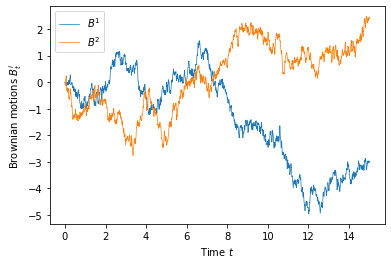

In [44]:
T = 15
h = 0.01
n = 1500
M = int(1e4)

times=np.linspace(0, T, n+1, endpoint=True)
B=forward_brownian_motion(n, T, M)

fig, ax = plt.subplots(1, 1)
ax.plot(times, B[0,:,0],
        linewidth=.7, label="$B^1$"
)
ax.plot(times, B[0,:,1],
        linewidth=.7, label="$B^2$"
)
ax.set_xlabel("Time $t$")
ax.set_ylabel("Brownian motions $B_t^i$")
ax.legend()

#### Simulation of the instantaneous interest rate
We first compute the components of the sum giving the interest rate by using a recurrence relation given by Ito's formula as seen before:
$X^{(i)}_{t_j} = \theta_i + (X^{(i)}_{t_{j-1}} − \theta_i )e^{−\lambda_ih} + \sigma U_i $ , $,i\in \{1,2\}$ where $U_i$, stochastic integrals are defined by: $U_i=\int_{t_{j-1}}^{t_j} e^{−\lambda_i (t_j −s)} dB_s^i$ and are mutually independent, so can be simulated independently.
We then show easily that $U_i \sim \mathcal{N}(0, \frac{1-e^{-2 \lambda_i h}}{2 \lambda_i})$ 

In [59]:
def compute_X(X0, thetas, lambdas, sigmas, n, T, M):
              
    h = T/n
    variance = ((1 - np.exp(-2. * lambdas * h))/(2.*lambdas)).reshape(1, 1, 2)
    integrals = np.sqrt(variance)*np.random.randn(M, n, 2)
    
    result = np.zeros((M, n+1, 2))
    result[:, 0] = X0
    for j in range(n):
        stoch_int = integrals[:, j]  # get stochastic integral U
        result[:, j+1] = thetas + (result[:, j] - thetas)*np.exp(-lambdas*h) + sigmas*stoch_int
    return result

> Let's test the result by ploting

In [60]:
X0 = np.array([0.02, 0.02])
lambdas = np.array([1., 0.1])
thetas = np.array([0.05, 0.05])
sigmas = np.array([0.05, 0.05])

Text(0, 0.5, '$X_t$')

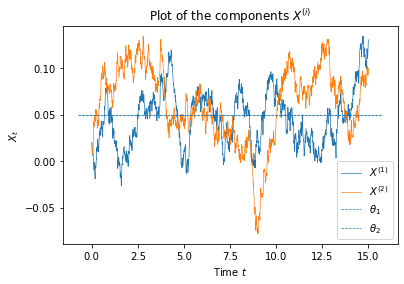

In [68]:
X_traj = compute_X(X0, thetas, lambdas, sigmas, n, T, M=1)
times_traj = np.linspace(0, T, n+1)

plt.plot(times_traj, X_traj[0, :, 0],
         linewidth=.7, label='$X^{(1)}$')
plt.plot(times_traj , X_traj[0, :, 1],
         linewidth=.7, label='$X^{(2)}$')
xlims = plt.xlim()
plt.hlines(thetas[0], *xlims, label=r"$\theta_1$", linestyle="--", linewidth=.7)
plt.hlines(thetas[1], *xlims, label=r"$\theta_2$", linestyle="--", linewidth=.7)
plt.legend()
plt.title("Plot of the components $X^{(i)}$")
plt.xlabel("Time $t$")
plt.ylabel('$X_t$')


In [65]:
def Interest_Rate_Traj(X0, thetas, lambdas, sigmas, n, T, M):
    comp_traj = compute_X(X0, thetas, lambdas, sigmas, n, T, M)
    # shape N * n
    # sum the two factors
    interest_rate_traj=  comp_traj.sum(axis=2)  
    return  interest_rate_traj

Text(0.5, 1.0, 'Interest rate process $r_t$')

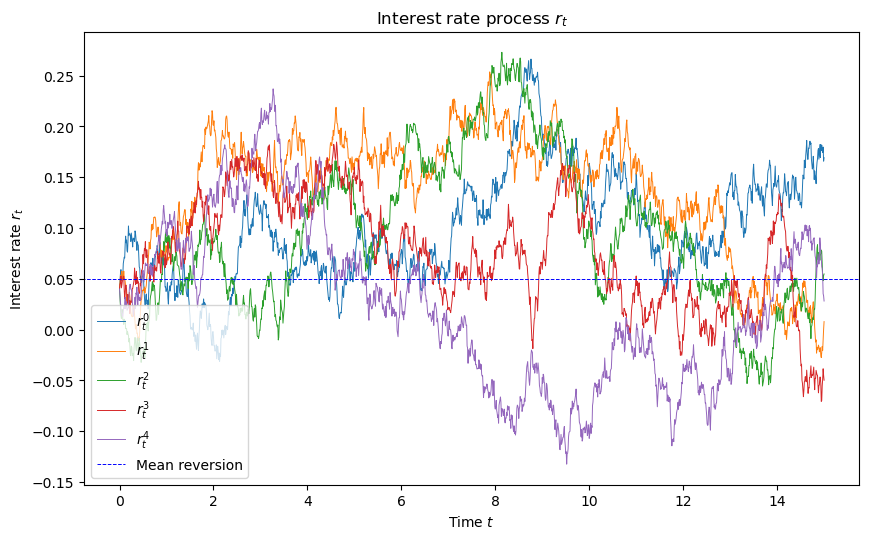

In [67]:
interest_rate_traj = Interest_Rate_Traj(X0, thetas, lambdas, sigmas, n, T, M)
times_traj = np.linspace(0, T, n+1)


fig, ax1 = plt.subplots(1,1, figsize=(10,6), dpi=100)

for i in range(5):
    ax1.plot(times_traj, interest_rate_traj[i], linewidth=.7,label='$r_t^{:,.0f}$'.format(i))
ax1.set_xlabel('Time $t$')
ax1.set_ylabel('Interest rate $r_t$')
ax1.axhline(thetas[0], *xlims, c='blue', label="Mean reversion", linestyle="--", linewidth=.7)
ax1.legend()
ax1.set_title('Interest rate process $r_t$')

#### 1.b) Monte Carlo approximation of the no-arbitrage price
Build a program which computes a Monte Carlo approximation $\hat{P}^{n,M}_0(t_j)$
of the zero-coupon bond approximate value $P^n_0(t_j):=\mathbb{E}^{\mathbb{Q}}[e^{-h \sum_{k=1}^j r_{t_k}}]=$,
and the corresponding Monte Carlo approximation of the yields to
maturity $\hat{R}^{n,M}_0(t_j)$

> A straightforward Monte Carlo estimator of the price is given by
$\hat{P}^{n,M}_0(t_j)=\frac{1}{M}\sum_{m=1}^M exp({-h \sum_{k=1}^j r_{t_k}^{(m)}})$
and an estimator of the yield at maturity is given by $\hat{R}^{n,M}_0(t_j)=-\frac{ln(\hat{P}^{n,M}_0(t_j))}{t_j}$
 


In [69]:
def Monte_Carlo_Estimators(interest_rates, n, T):
    """
    Args:
        interest_rates (ndarray): array of the interest rate values, shape M * n
    
    Returns:
        Monte Carlo estimator of the no-arbitrage price of the ZCB, and the corresponding yields.
    """
    h = T/n
    cumul = np.cumsum(interest_rates, axis=1)
    expo_term = np.exp(-h * cumul)
    prices_ZCB = np.mean(expo_term, axis=0)
    times = np.linspace(0, T, n+1)[1:]  # remove 0
    yields = -np.log(prices_ZCB[1:])/times
    return prices_ZCB, yields

Text(0.5, 1.0, 'ZCB price estimate as a function of time')

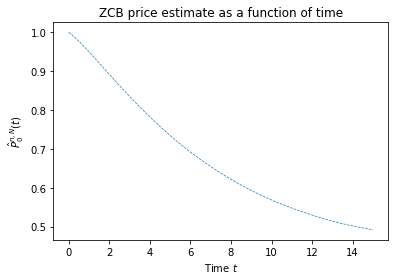

In [73]:
interest_rates = Interest_Rate_Traj(X0, thetas, lambdas, sigmas, n, T, M)
price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)

plt.plot(times,price_ZCB_MC, linewidth=.7, linestyle='--')
plt.xlabel("Time $t$")
plt.ylabel("$\hat{P}_0^{n, N}(t)$")
plt.title("ZCB price estimate as a function of time")

>**Comments:** *As expected,the bond is less valuable as the maturity time 
T approaches.*

#### c) Consider the parameters values $\lambda_1 = 1, \lambda_2 = 0.1$ , n := 1500, T := 15, M =104,and $\theta_i =0.05,\sigma_i =0.05,x_i =0.02$ ,i=1,2. Plot the yield curve $\{R_0(t_j ), j = 0, . . . , n\}$, and compare to the corresponding Monte Carlo approximation $\{\hat{R}^{n,M}_0(t_j),j = 0, . . . , n\}$.

> $R_0(T)=\rho_1(T)+\rho_2(T)$ for all $T\geq0$, with $\rho_i(T)=\theta_i+(x_i−\theta_i)\frac{Λ_i(T)}{T}−\frac{\sigma_i2}{2T} \int_0^T Λ_i(t)^2dt$,and $Λ_i(t):=\frac{1−e^{−λ_it}}{\lambda_i}$.

In [74]:
def Real_yield(X0, thetas, lambdas, sigmas, n, T):
    h = T/n  # timestep
    times = np.linspace(0, T, n+1)[1:, None]  # times range shape n * 1, 0 removed
    expo_lbda_t = np.exp(-lambdas*times)
    
    Lambda_t = (1. - expo_lbda_t)/lambdas
    integral_Lambda = times + (2/lambdas)*(expo_lbda_t - 1) + (0.5/lambdas)*(1 - expo_lbda_t**2)
    
    integral_Lambda = integral_Lambda/(lambdas**2)
    # compute now the values of rho shape (n+1) * 2
    rhos = thetas + (X0 - thetas)*Lambda_t/times - 0.5*sigmas**2/times*integral_Lambda
    
    real_yield=rhos.sum(axis=1) # the theorical value of the yield to maturity
    return real_yield

> Let's compare the real yield and the MC approximation via a plot

Text(0.5, 1.0, 'ZCB yields at maturity')

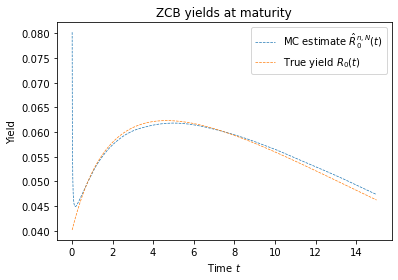

In [75]:
real_yield_to_maturity = Real_yield(X0, thetas, lambdas, sigmas, n, T)

plt.plot(times[1:], yields_to_maturity_MC,
         linewidth=.7, linestyle='--', label="MC estimate $\hat{R}_0^{n, N}(t)$")
plt.plot(times[1:],real_yield_to_maturity,
         linewidth=.7, linestyle='--', label="True yield $R_0(t)$")
plt.xlabel("Time $t$")
plt.ylabel("Yield")
plt.legend()
plt.title("ZCB yields at maturity")

>**Comments:** We note a divergence as t goes to 0
This can be caused by numerical error, as the computing of the estimator makes loose the boundedness of the ratio $\frac{ln(P_0(t))}{t}$.

### 2. Under the parameters values of Question 1c, comment the effect of $x_i$ on the Monte Carlo approximation by:
#### (a) fixing $x_2$ and varying $x_1$ in $ \{0.01, 0.02, 0.05\}$

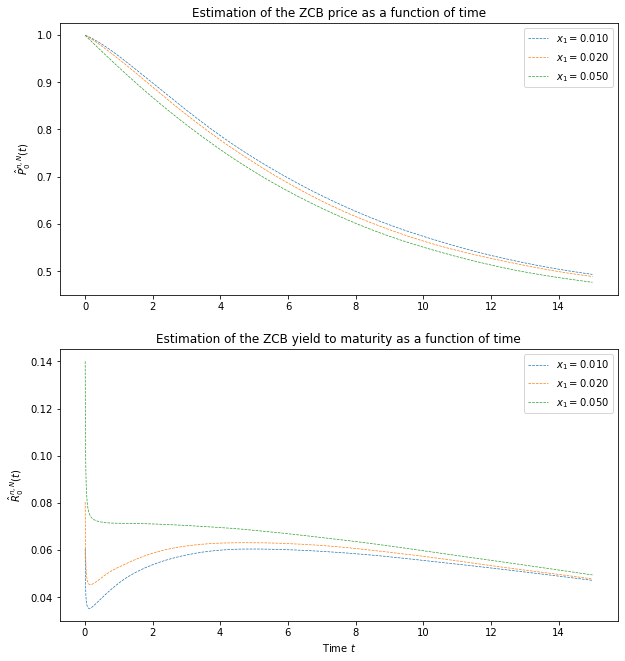

In [78]:
x2 = 0.02
prices_MC = []
yields_MC = []
x1_range = [0.01, 0.02, 0.05]
for x1 in x1_range:
    X0 = np.array([x1, x2])
    interest_rates = Interest_Rate_Traj(X0, thetas, lambdas, sigmas, n, T, M)
    price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)
    prices_MC.append(price_ZCB_MC)
    yields_MC.append(yields_to_maturity_MC)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,11))
for i, x1 in enumerate(x1_range):
    price_mc = prices_MC[i]
    ax0.plot(times, price_mc, linewidth=.7, linestyle='--',
             label="$x_1={:.3f}$".format(x1))
    yields_mc = yields_MC[i]
    ax1.plot(times[1:], yields_mc,
             linewidth=.7, linestyle='--',
             label="$x_1={:.3f}$".format(x1))

ax0.set_ylabel("$\hat{P}_0^{n, N}(t)$")
ax0.set_title("Estimation of the ZCB price as a function of time")
ax0.legend()
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("$\hat{R}_0^{n, N}(t)$")
ax1.set_title("Estimation of the ZCB yield to maturity as a function of time")
ax1.legend()

#### (b) fixing  $x_1$ and varying $x_2$ in $ \{0.01, 0.02, 0.05\}$

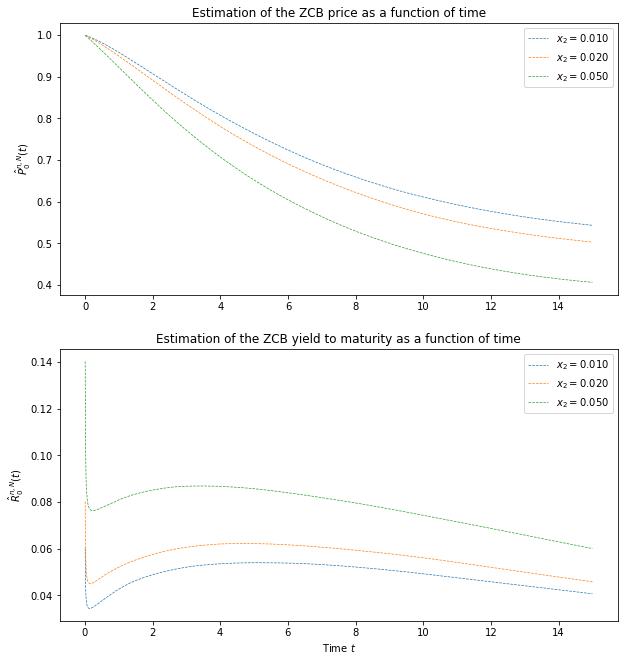

In [79]:
x1 = 0.02
prices_MC = []
yields_MC = []
x2_range = [0.01, 0.02, 0.05]
for x2 in x2_range:
    X0 = np.array([x1, x2])
    interest_rates = Interest_Rate_Traj(X0, thetas, lambdas, sigmas, n, T, M)
    price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)
    prices_MC.append(price_ZCB_MC)
    yields_MC.append(yields_to_maturity_MC)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,11))
for i, x2 in enumerate(x2_range):
    price_mc = prices_MC[i]
    ax0.plot(times, price_mc, linewidth=.7, linestyle='--',
             label="$x_2={:.3f}$".format(x2))
    yields_mc = yields_MC[i]
    ax1.plot(times[1:], yields_mc,
             linewidth=.7, linestyle='--',
             label="$x_2={:.3f}$".format(x2))

ax0.set_ylabel("$\hat{P}_0^{n, N}(t)$")
ax0.set_title("Estimation of the ZCB price as a function of time")
ax0.legend()
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("$\hat{R}_0^{n, N}(t)$")
ax1.set_title("Estimation of the ZCB yield to maturity as a function of time")
ax1.legend()

>**Comments:**
 We can see that the effect of the modification for any of the components $X^{(i)}_0$ seems to be the same: the variation of the starting values X0 changes the asymptotic price and shifts the maturity curve. 

### 3. Under the parameters values of Question 1c, comment the effect of $\theta_i$ on the Monte Carlo approximation by:
#### (a) fixing $\theta_2$ and varying $\theta_1$ in $\{0.01, 0.05, 0.1\}$

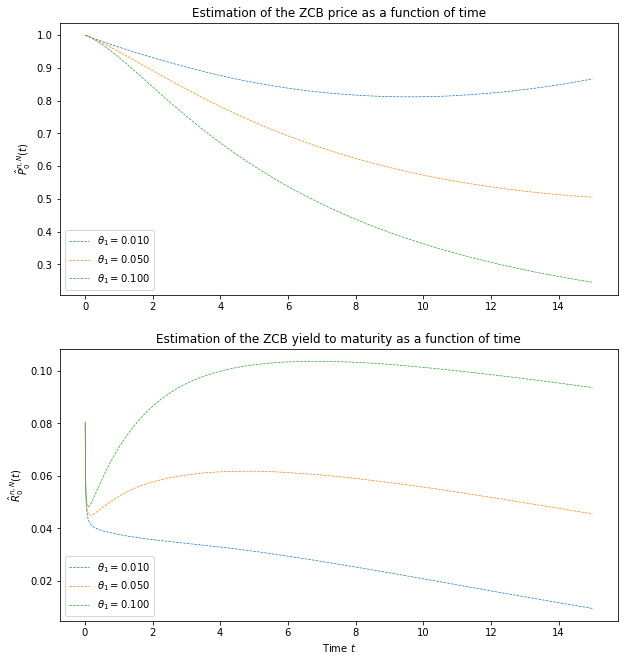

In [87]:
X0 = np.array([0.02, 0.02])
prices_MC = []
yields_MC = []
theta1_range = [0.01, 0.05, 0.1]
for theta1 in theta1_range:
    theta_ = np.array([theta1, thetas[1]])
    interest_rates = Interest_Rate_Traj(X0, theta_, lambdas, sigmas, n, T, M)
    price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)
    prices_MC.append(price_ZCB_MC)
    yields_MC.append(yields_to_maturity_MC)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,11))
for i, theta1 in enumerate(theta1_range):
    price_mc = prices_MC[i]
    ax0.plot(times, price_mc, linewidth=.7, linestyle='--',
             label=r"$\theta_1"+"={:.3f}$".format(theta1))
    yields_mc = yields_MC[i]
    ax1.plot(times[1:], yields_mc,
             linewidth=.7, linestyle='--',
             label=r"$\theta_1"+"={:.3f}$".format(theta1))

ax0.set_ylabel("$\hat{P}_0^{n, N}(t)$")
ax0.set_title("Estimation of the ZCB price as a function of time")
ax0.legend()
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("$\hat{R}_0^{n, N}(t)$")
ax1.set_title("Estimation of the ZCB yield to maturity as a function of time")
ax1.legend()

#### (b) fixing $\theta_1$ and varying $\theta_2$ in $\{0.01, 0.05, 0.1\}$

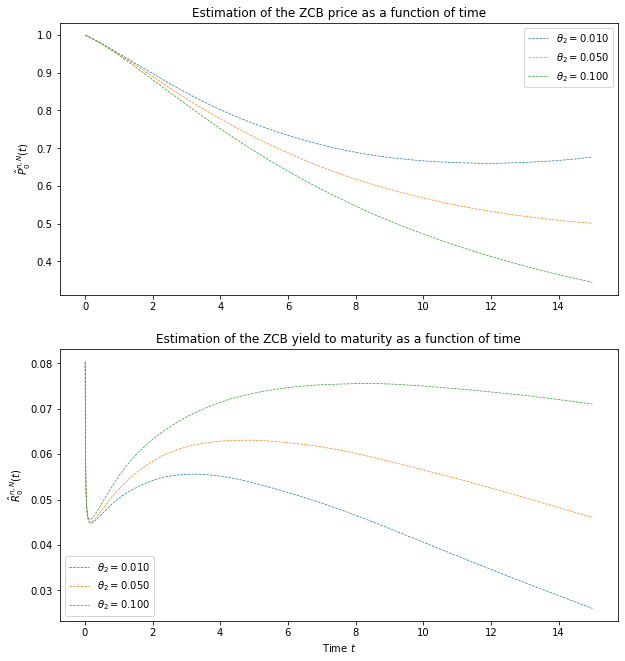

In [88]:
X0 = np.array([0.02, 0.02])
prices_MC = []
yields_MC = []
theta2_range = [0.01, 0.05, 0.1]
for theta2 in theta2_range:
    theta_ = np.array([thetas[0],theta2])
    interest_rates = Interest_Rate_Traj(X0, theta_, lambdas, sigmas, n, T, M)
    price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)
    prices_MC.append(price_ZCB_MC)
    yields_MC.append(yields_to_maturity_MC)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,11))
for i, theta2 in enumerate(theta2_range):
    price_mc = prices_MC[i]
    ax0.plot(times, price_mc, linewidth=.7, linestyle='--',
             label=r"$\theta_2"+"={:.3f}$".format(theta2))
    yields_mc = yields_MC[i]
    ax1.plot(times[1:], yields_mc,
             linewidth=.7, linestyle='--',
             label=r"$\theta_2"+"={:.3f}$".format(theta2))

ax0.set_ylabel("$\hat{P}_0^{n, N}(t)$")
ax0.set_title("Estimation of the ZCB price as a function of time")
ax0.legend()
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("$\hat{R}_0^{n, N}(t)$")
ax1.set_title("Estimation of the ZCB yield to maturity as a function of time")
ax1.legend()

>**Comments:**
The mean $\theta_i$ of $X^{(i)}$ has a higher impact on the ZCB price which changes when $\theta_i$ varies, and also the higher drift, the price and the yield curve of the ZCB decrease at T.
The component $X^{(1)}$ moves reversally faster towards the mean than the other component $X^{(2)}$r, because it has a higher coefficient $\lambda_1$. 

### 4. Under the parameters values of Question 1c, comment the effect of $\sigma_i$ on the Monte Carlo approximation by:
#### (a) fixing $\sigma_2$ and varying $\sigma_1$  in $\{0.01, 0.05, 0.1\}$

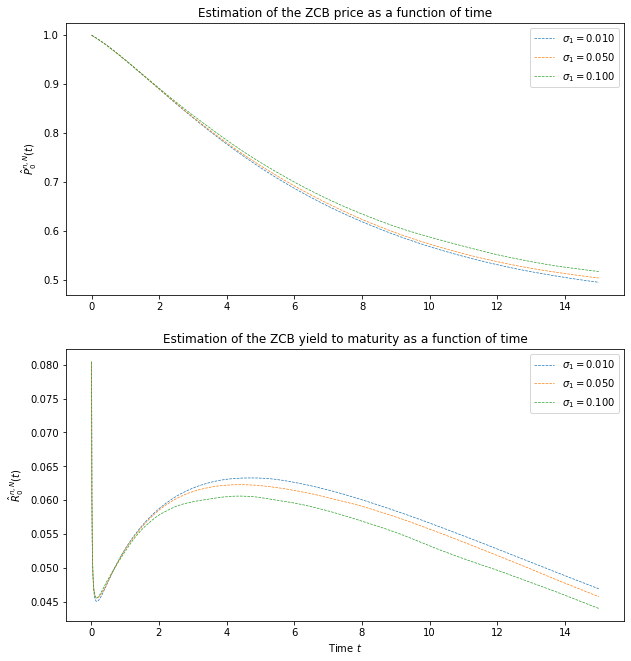

In [89]:
X0 = np.array([0.02, 0.02])
thetas = np.array([0.05, 0.05])

prices_MC = []
yields_MC = []
sigma1_range = [0.01, 0.05, 0.1]
for sigma1 in sigma1_range:
    sigma_ = np.array([sigma1, sigmas[1]])
    interest_rates = Interest_Rate_Traj(X0, thetas, lambdas, sigma_, n, T, M)
    price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)
    prices_MC.append(price_ZCB_MC)
    yields_MC.append(yields_to_maturity_MC)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,11))
for i, sigma1 in enumerate(sigma1_range):
    price_mc = prices_MC[i]
    ax0.plot(times, price_mc, linewidth=.7, linestyle='--',
             label=r"$\sigma_1"+"={:.3f}$".format(sigma1))
    yields_mc = yields_MC[i]
    ax1.plot(times[1:], yields_mc,
             linewidth=.7, linestyle='--',
             label=r"$\sigma_1"+"={:.3f}$".format(sigma1))

ax0.set_ylabel("$\hat{P}_0^{n, N}(t)$")
ax0.set_title("Estimation of the ZCB price as a function of time")
ax0.legend()
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("$\hat{R}_0^{n, N}(t)$")
ax1.set_title("Estimation of the ZCB yield to maturity as a function of time")
ax1.legend()

#### (b) fixing $\sigma_1$ and varying $\sigma_2$  in $\{0.01, 0.05, 0.1\}$

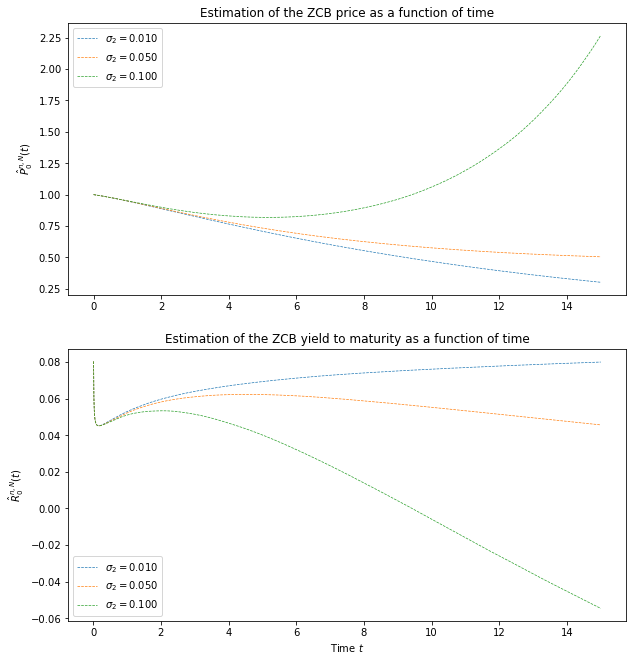

In [90]:
X0 = np.array([0.02, 0.02])
thetas = np.array([0.05, 0.05])

prices_MC = []
yields_MC = []
sigma2_range = [0.01, 0.05, 0.1]
for sigma2 in sigma2_range:
    sigma_ = np.array([sigmas[0],sigma2])
    interest_rates = Interest_Rate_Traj(X0, thetas, lambdas, sigma_, n, T, M)
    price_ZCB_MC, yields_to_maturity_MC = Monte_Carlo_Estimators(interest_rates, n, T)
    prices_MC.append(price_ZCB_MC)
    yields_MC.append(yields_to_maturity_MC)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,11))
for i, sigma2 in enumerate(sigma2_range):
    price_mc = prices_MC[i]
    ax0.plot(times, price_mc, linewidth=.7, linestyle='--',
             label=r"$\sigma_2"+"={:.3f}$".format(sigma2))
    yields_mc = yields_MC[i]
    ax1.plot(times[1:], yields_mc,
             linewidth=.7, linestyle='--',
             label=r"$\sigma_2"+"={:.3f}$".format(sigma2))

ax0.set_ylabel("$\hat{P}_0^{n, N}(t)$")
ax0.set_title("Estimation of the ZCB price as a function of time")
ax0.legend()
ax1.set_xlabel("Time $t$")
ax1.set_ylabel("$\hat{R}_0^{n, N}(t)$")
ax1.set_title("Estimation of the ZCB yield to maturity as a function of time")
ax1.legend()

>**Comments:**
Changing the volatility of the component $X^{(2)}$, seems to have much more impact on the interest rate and the ZCB price, as its coefficient $\lambda_2$ is lower than $\lambda_1$.
We note that, the ZCB price( resp. the ZCB yield to maturity) increases (resp. decreases) over the times with respect to the volatility $\sigma$, and that slowly when $\sigma_1$ increases and a little bit sharply as $\sigma_2$ increases.